# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
 # Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#query_url = f"{url}appid={weather_api_key}&q="

In [6]:
# define count of pass throughs
count_one = 0
set_one = 1

# set lists for the dataframe
Lat=[]
Lng=[]
Max_Temp=[]
Humidity=[]
Cloudiness=[]
Wind=[]
Speed=[]
Country=[]
Date=[]
city_wr=[]

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_wr.append(city)
        else:
            count_one += 1
            city_wr.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

City not found. Skipping...
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | bay roberts
Processing Record 7 of Set 1 | alta floresta
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | severo-kurilsk
City not found. Skipping...
Processing Record 11 of Set 1 | tazovskiy
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | jamestown
City not found. Skipping...
Processing Record 15 of Set 1 | namibe
Processing Record 16 of Set 1 | uruguaiana
Processing Record 17 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | nanortalik
Processing Record 20 of Set 1 | masallatah
Processing Record 21 of Set 1 | thompson
City not fo

Processing Record 43 of Set 4 | chambas
Processing Record 44 of Set 4 | rovenki
Processing Record 45 of Set 4 | airai
Processing Record 46 of Set 4 | saint-philippe
Processing Record 47 of Set 4 | lasa
City not found. Skipping...
City not found. Skipping...
Processing Record 48 of Set 4 | georgetown
Processing Record 49 of Set 4 | half moon bay
Processing Record 1 of Set 5 | ust-tsilma
Processing Record 2 of Set 5 | novopavlovka
Processing Record 3 of Set 5 | atasu
Processing Record 4 of Set 5 | antalaha
Processing Record 5 of Set 5 | soltsy
Processing Record 6 of Set 5 | port blair
Processing Record 7 of Set 5 | dunedin
Processing Record 8 of Set 5 | kropotkin
Processing Record 9 of Set 5 | mandera
Processing Record 10 of Set 5 | high level
Processing Record 11 of Set 5 | walvis bay
Processing Record 12 of Set 5 | lorengau
Processing Record 13 of Set 5 | acari
Processing Record 14 of Set 5 | petrokhorion
Processing Record 15 of Set 5 | gladstone
Processing Record 16 of Set 5 | linqion

Processing Record 40 of Set 8 | kovernino
Processing Record 41 of Set 8 | supaul
Processing Record 42 of Set 8 | minna
Processing Record 43 of Set 8 | cidreira
Processing Record 44 of Set 8 | vung tau
City not found. Skipping...
Processing Record 45 of Set 8 | piopio
Processing Record 46 of Set 8 | illapel
Processing Record 47 of Set 8 | pirgos
Processing Record 48 of Set 8 | porbandar
Processing Record 49 of Set 8 | katsuura
Processing Record 1 of Set 9 | ilembo
Processing Record 2 of Set 9 | ponnani
Processing Record 3 of Set 9 | great yarmouth
Processing Record 4 of Set 9 | portland
Processing Record 5 of Set 9 | dukat
Processing Record 6 of Set 9 | taltal
Processing Record 7 of Set 9 | odweyne
Processing Record 8 of Set 9 | koping
Processing Record 9 of Set 9 | nouadhibou
Processing Record 10 of Set 9 | bubaque
Processing Record 11 of Set 9 | srednekolymsk
Processing Record 12 of Set 9 | novikovo
Processing Record 13 of Set 9 | vardo
Processing Record 14 of Set 9 | champerico
Proce

Processing Record 28 of Set 12 | liwale
Processing Record 29 of Set 12 | lana
Processing Record 30 of Set 12 | zhob
Processing Record 31 of Set 12 | ubinskoye
Processing Record 32 of Set 12 | gamba
Processing Record 33 of Set 12 | kuala terengganu
Processing Record 34 of Set 12 | tarrafal
Processing Record 35 of Set 12 | russell
Processing Record 36 of Set 12 | deogarh
City not found. Skipping...
Processing Record 37 of Set 12 | sisimiut
Processing Record 38 of Set 12 | luxor
Processing Record 39 of Set 12 | umarkot
Processing Record 40 of Set 12 | chegdomyn
Processing Record 41 of Set 12 | buala
Processing Record 42 of Set 12 | vapi
Processing Record 43 of Set 12 | orocue
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# create a data frame from cities, lat, and temp
weather_dict = {
        "City":city_wr,
        "Lat":Lat,
        "Lng":Lng,
        "Max_Temp":Max_Temp,
        "Humidity":Humidity,
        "Cloudiness":Cloudiness,
        "Wind":Wind,
        "Country":Country,
        "Date":Date
}
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind,Country,Date
0,ushuaia,-54.8000,-68.3000,55.40,54,20,18.41,AR,1612705770
1,busselton,-33.6500,115.3333,62.01,97,100,1.01,AU,1612705857
2,port elizabeth,-33.9180,25.5701,69.80,94,75,9.22,ZA,1612705857
3,kodiak,57.7900,-152.4072,26.60,63,75,4.61,US,1612705565
4,new norfolk,-42.7826,147.0587,55.40,62,90,4.61,AU,1612705858


In [8]:
weather_df.describe()

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind,Date
count,582.000000,582.000000,582.000000,582.000000,582.00000,582.000000,5.820000e+02
mean,20.346087,21.754270,50.881735,70.144330,54.82646,8.931220,1.612706e+09
std,33.000431,87.870325,33.828395,20.815718,40.38156,6.822848,6.114920e+01
min,-54.800000,-175.200000,-47.000000,8.000000,0.00000,0.200000,1.612706e+09
25%,-6.400200,-54.653325,27.627500,60.000000,3.25000,4.000000,1.612706e+09
50%,25.530250,24.696800,61.845000,75.000000,75.00000,7.000000,1.612706e+09
75%,48.308300,100.034750,78.655000,86.000000,94.00000,12.127500,1.612706e+09
max,78.218600,178.416700,102.970000,100.000000,100.00000,48.340000,1.612706e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
weather_df.loc[weather_df["Humidity"]<=100].describe()

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind,Date
count,582.000000,582.000000,582.000000,582.000000,582.00000,582.000000,5.820000e+02
mean,20.346087,21.754270,50.881735,70.144330,54.82646,8.931220,1.612706e+09
std,33.000431,87.870325,33.828395,20.815718,40.38156,6.822848,6.114920e+01
min,-54.800000,-175.200000,-47.000000,8.000000,0.00000,0.200000,1.612706e+09
25%,-6.400200,-54.653325,27.627500,60.000000,3.25000,4.000000,1.612706e+09
50%,25.530250,24.696800,61.845000,75.000000,75.00000,7.000000,1.612706e+09
75%,48.308300,100.034750,78.655000,86.000000,94.00000,12.127500,1.612706e+09
max,78.218600,178.416700,102.970000,100.000000,100.00000,48.340000,1.612706e+09


In [10]:
#  Get the indices of cities that have humidity over 100%.
print(weather_df.loc[weather_df["Humidity"]>100,:])

Empty DataFrame
Columns: [City, Lat, Lng, Max_Temp, Humidity, Cloudiness, Wind, Country, Date]
Index: []


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [12]:
# Export the city data into a .csv file.
weather_df.to_csv("output_data/city_weather.csv", index=False)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

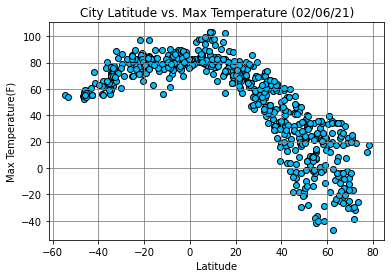

In [13]:
plt.title('City Latitude vs. Max Temperature (02/06/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.scatter(weather_df['Lat'],weather_df['Max_Temp'],edgecolors='black',facecolor='deepskyblue')
plt.grid(b=True, which="major",axis="both", linestyle="-",color="gray")
plt.savefig('Figures/fig1.png')
plt.show()

## Latitude vs. Humidity Plot

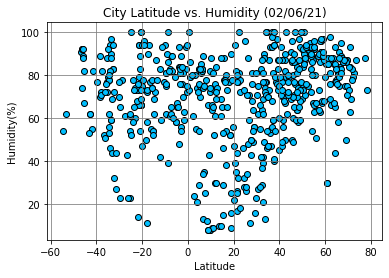

In [14]:
plt.title('City Latitude vs. Humidity (02/06/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.scatter(weather_df['Lat'],weather_df['Humidity'],edgecolors='black',facecolor='deepskyblue')
plt.grid(b=True, which="major",axis="both", linestyle="-",color="gray")
plt.savefig('Figures/fig2.png')
plt.show()

## Latitude vs. Cloudiness Plot

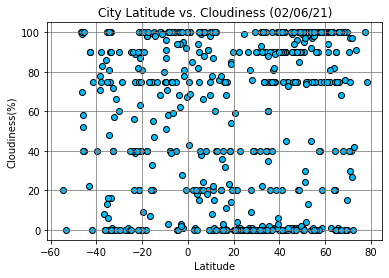

In [15]:
plt.title('City Latitude vs. Cloudiness (02/06/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'],edgecolors='black',facecolor='deepskyblue')
plt.grid(b=True, which="major",axis="both", linestyle="-",color="gray")
plt.savefig('Figures/fig3.png')
plt.show()

## Latitude vs. Wind Speed Plot

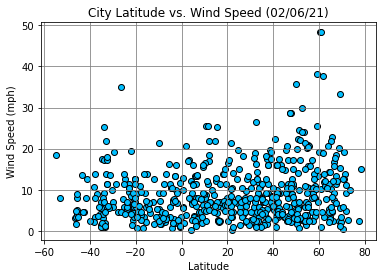

In [16]:
plt.title('City Latitude vs. Wind Speed (02/06/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.scatter(weather_df['Lat'],weather_df['Wind'],edgecolors='black',facecolor='deepskyblue')
plt.grid(b=True, which="major",axis="both", linestyle="-",color="gray")
plt.savefig('Figures/fig4.png')
plt.show()

## Linear Regression

In [17]:
north=weather_df.loc[weather_df['Lat']>0,:]
south=weather_df.loc[weather_df['Lat']<0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.86.


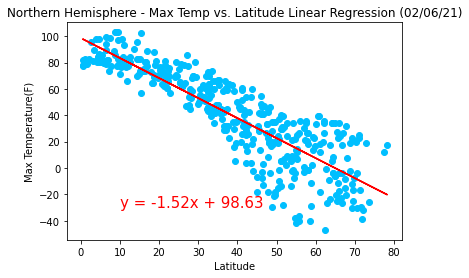

In [18]:

plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression (02/06/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
correlation=st.pearsonr(north['Lat'],north['Max_Temp'])
# Print the answer to above calculation
print(f"""The r-value is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(north['Lat'],north['Max_Temp'])
regress_values = north['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north['Lat'],north['Max_Temp'],facecolor='deepskyblue')
plt.plot(north['Lat'],regress_values,"r-")
plt.annotate(line_eq,(10,-30),fontsize=15,color="red")
plt.savefig('Figures/fig5.png')
plt.show()

In [ ]:
Conclusion: Investigating the relationship between temporature and latitude in at northern hemisphere, 
we find a strong negative correlation (r=-.86), indicating a strong negative linear relationship between 
the two variables. We calculated the equation for the line of best fit as Max Temporature=-1.52(Latitude)+98.63. 
This indicates that when latitude is 0, the predicted temporature is 98.63. For every 1 degree increase in latitude,
temprature is predicted to decrease by 1.52 degrees.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.67.


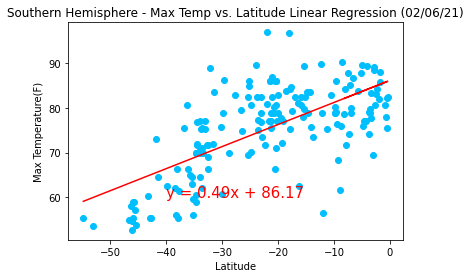

In [26]:

plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression (02/06/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
correlation=st.pearsonr(south['Lat'],south['Max_Temp'])
# Print the answer to above calculation
print(f"""The r-value is {round(correlation[0],2)}.""")
# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(south['Lat'],south['Max_Temp'])
regress_values = south['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(south['Lat'],south['Max_Temp'],facecolor='deepskyblue')
plt.plot(south['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-40,60),fontsize=15,color="red")
plt.savefig('Figures/fig6.png')
plt.show()


In [ ]:
Conclusion: Investigating the relationship between temporature and latitude in at southern hemisphere, 
we find a strong positive correlation (r=0.67), indicating a strong positive linear relationship between 
the two variables. We calculated the equation for the line of best fit as Max Temporature=0.49(Latitude)+86.17. 
This indicates that when latitude is 0, the predicted temporature is 86.17. For every 1 degree increase in latitude,
temprature is predicted to decrease by 0.49 degrees.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.4.


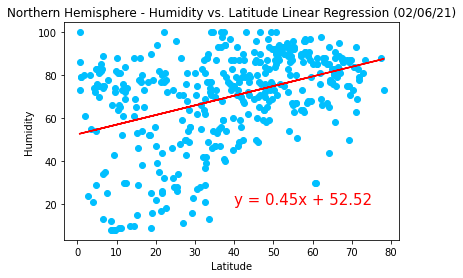

In [20]:

plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression (02/06/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
correlation=st.pearsonr(north['Lat'],north['Humidity'])
# Print the answer to above calculation
print(f"""The r-value is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(north['Lat'],north['Humidity'])
regress_values = north['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north['Lat'],north['Humidity'],facecolor='deepskyblue')
plt.plot(north['Lat'],regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.savefig('Figures/fig7.png')
plt.show()

In [ ]:
Conclusion: Investigating the relationship between humidity and latitude in at northern hemisphere, 
we find there is no strong correlation (r=0.4), indicating a no strong linear relationship between 
the two variables. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.05.


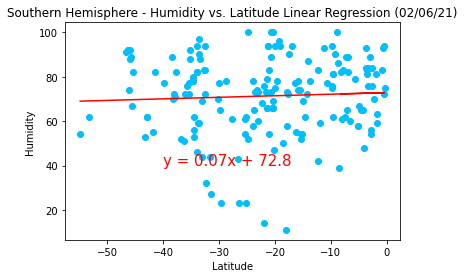

In [21]:
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression (02/06/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
correlation=st.pearsonr(south['Lat'],south['Humidity'])
# Print the answer to above calculation
print(f"""The r-value is {round(correlation[0],2)}.""")
# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(south['Lat'],south['Humidity'])
regress_values = south['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(south['Lat'],south['Humidity'],facecolor='deepskyblue')
plt.plot(south['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.savefig('Figures/fig8.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.21.


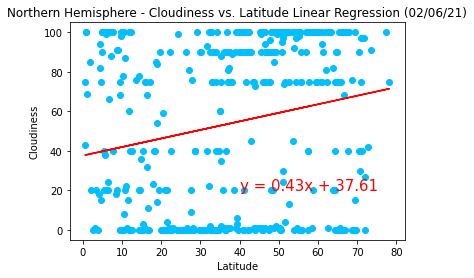

In [22]:
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression (02/06/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
correlation=st.pearsonr(north['Lat'],north['Cloudiness'])
# Print the answer to above calculation
print(f"""The r-value is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(north['Lat'],north['Cloudiness'])
regress_values = north['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north['Lat'],north['Cloudiness'],facecolor='deepskyblue')
plt.plot(north['Lat'],regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.savefig('Figures/fig9.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.2.


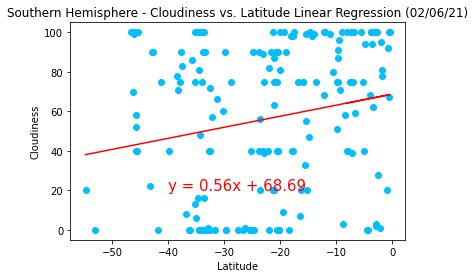

In [23]:
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression (02/06/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
correlation=st.pearsonr(south['Lat'],south['Cloudiness'])
# Print the answer to above calculation
print(f"""The r-value is {round(correlation[0],2)}.""")
# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(south['Lat'],south['Cloudiness'])
regress_values = south['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(south['Lat'],south['Cloudiness'],facecolor='deepskyblue')
plt.plot(south['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.savefig('Figures/fig10.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.14.


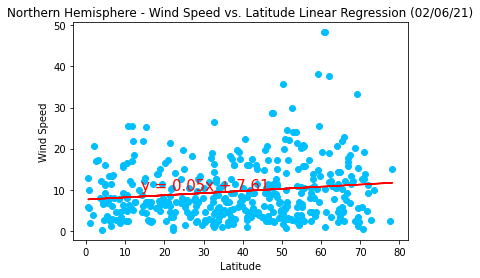

In [24]:
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression (02/06/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
correlation=st.pearsonr(north['Lat'],north['Wind'])
# Print the answer to above calculation
print(f"""The r-value is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(north['Lat'],north['Wind'])
regress_values = north['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north['Lat'],north['Wind'],facecolor='deepskyblue')
plt.plot(north['Lat'],regress_values,"r-")
plt.annotate(line_eq,(14,10),fontsize=15,color="red")
plt.savefig('Figures/fig11.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.1.


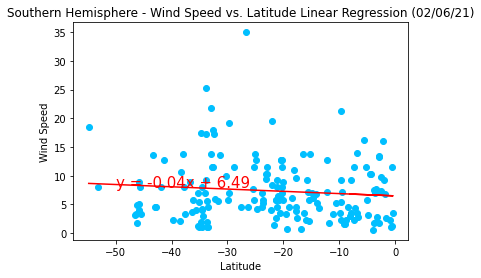

In [25]:
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression (02/06/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
correlation=st.pearsonr(south['Lat'],south['Wind'])
# Print the answer to above calculation
print(f"""The r-value is {round(correlation[0],2)}.""")
# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(south['Lat'],south['Wind'])
regress_values = south['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(south['Lat'],south['Wind'],facecolor='deepskyblue')
plt.plot(south['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-50,8),fontsize=15,color="red")
plt.savefig('Figures/fig12.png')
plt.show()